IMPORTACIONES

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

DATA

In [4]:
df_pc = pd.read_csv('./data/train_limpio.csv')

a ver las correlaciones

In [5]:
matriz_corr = df_pc.corr()

In [6]:
matriz_corr

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
Company,1.000000,0.070348,-0.001045,-0.101410,0.051451,0.149157,0.069520,0.035565,0.039797,0.131334,-0.139495,0.145581
Product,0.070348,1.000000,0.036143,-0.196198,0.176626,-0.031476,0.009453,0.057376,0.033712,0.099288,-0.240252,0.125481
TypeName,-0.001045,0.036143,1.000000,-0.050919,-0.062903,-0.074327,-0.256123,0.009937,-0.240182,0.071786,-0.251722,-0.127641
Inches,-0.101410,-0.196198,-0.050919,1.000000,-0.086326,0.294392,0.245243,-0.206137,0.238190,0.035291,0.830465,0.077798
ScreenResolution,0.051451,0.176626,-0.062903,-0.086326,1.000000,0.187727,0.460900,0.108014,0.185745,0.158536,-0.031450,0.576025
Cpu,0.149157,-0.031476,-0.074327,0.294392,0.187727,1.000000,0.378765,-0.092853,0.252725,0.226947,0.317559,0.439406
Ram,0.069520,0.009453,-0.256123,0.245243,0.460900,0.378765,1.000000,0.117451,0.370962,0.144764,0.416748,0.747748
Memory,0.035565,0.057376,0.009937,-0.206137,0.108014,-0.092853,0.117451,1.000000,-0.030505,0.010806,-0.157124,0.156143
Gpu,0.039797,0.033712,-0.240182,0.238190,0.185745,0.252725,0.370962,-0.030505,1.000000,0.075245,0.347327,0.375958
OpSys,0.131334,0.099288,0.071786,0.035291,0.158536,0.226947,0.144764,0.010806,0.075245,1.000000,0.009602,0.288204


In [7]:
abs(matriz_corr['Price_euros']).sort_values(ascending= False)

Price_euros         1.000000
Ram                 0.747748
ScreenResolution    0.576025
Cpu                 0.439406
Gpu                 0.375958
OpSys               0.288204
Weight              0.231857
Memory              0.156143
Company             0.145581
TypeName            0.127641
Product             0.125481
Inches              0.077798
Name: Price_euros, dtype: float64

<Axes: >

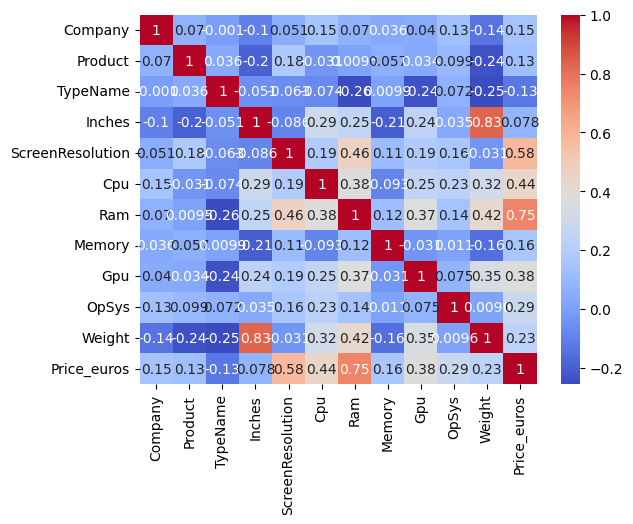

In [8]:
sns.heatmap(matriz_corr, cmap= 'coolwarm', annot= True)

In [9]:
features_correlacion = ['Ram', 'ScreenResolution', 'Cpu', 'Gpu', 'OpSys', 'Weight']

mutual information

In [10]:
# hago particiones

from sklearn.model_selection import train_test_split

train_set, validation_set = train_test_split(df_pc, test_size= 0.2, random_state= 42)

x_train = train_set.drop(['Price_euros'], axis= 1)
y_train = train_set['Price_euros']

x_validation = validation_set.drop(['Price_euros'], axis= 1)
y_validation = validation_set['Price_euros']

In [11]:
from sklearn.metrics import mutual_info_score

features = df_pc.drop(columns= ['Price_euros']).columns
target = 'Price_euros'

for col in features:
    print(f"MI({col};{target}):", mutual_info_score(df_pc[col],df_pc[target]))

# no se si fiarme de el mutual_info, creo que solo es aceptable para variables categoricas

MI(Company;Price_euros): 1.5890370754718
MI(Product;Price_euros): 5.186340525653613
MI(TypeName;Price_euros): 1.0148804256004413
MI(Inches;Price_euros): 1.2000018801299597
MI(ScreenResolution;Price_euros): 0.9199251710585341
MI(Cpu;Price_euros): 2.051777982497411
MI(Ram;Price_euros): 1.1047565519828173
MI(Memory;Price_euros): 1.8923749232322062
MI(Gpu;Price_euros): 0.692624612740363
MI(OpSys;Price_euros): 0.6552966860438589
MI(Weight;Price_euros): 3.8276974270775375


C:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects d

seleccion mediante modelo

In [12]:
x_train = df_pc.drop(['Price_euros'], axis= 1)
y_train = df_pc['Price_euros']

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

In [14]:
# standarizo antes

scaler = StandardScaler()

x_train = pd.DataFrame(scaler.fit_transform(x_train), columns= x_train.columns, index= x_train.index)
x_validation = pd.DataFrame(scaler.transform(x_validation), columns= x_validation.columns, index= x_validation.index)

In [15]:
x_train.describe()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
count,9.120000e+02,9.120000e+02,9.120000e+02,9.120000e+02,9.120000e+02,9.120000e+02,9.120000e+02,9.120000e+02,9.120000e+02,9.120000e+02,9.120000e+02
mean,-9.154471e-17,-4.285071e-17,1.119962e-16,5.190780e-16,5.064175e-17,1.129701e-16,2.824252e-17,7.791039e-17,-2.064625e-16,-4.207161e-16,1.743245e-16
std,1.000549e+00,1.000549e+00,1.000549e+00,1.000549e+00,1.000549e+00,1.000549e+00,1.000549e+00,1.000549e+00,1.000549e+00,1.000549e+00,1.000549e+00
min,-1.556354e+00,-1.755340e+00,-2.101919e+00,-3.480872e+00,-1.011988e+00,-2.705469e+00,-1.263717e+00,-1.979231e+00,-1.829683e+00,-4.461157e+00,-2.053966e+00
25%,-5.911076e-01,-7.296940e-01,-4.787606e-01,-7.168146e-01,-1.011988e+00,-5.612027e-01,-8.553149e-01,-8.141758e-01,-2.524894e-01,1.897063e-01,-8.143370e-01
50%,1.328272e-01,-1.165566e-01,3.328187e-01,4.171575e-01,1.273412e-02,4.134638e-01,-3.851156e-02,-3.747253e-02,-2.524894e-01,1.897063e-01,1.208215e-02
75%,8.567621e-01,8.490878e-01,3.328187e-01,4.171575e-01,1.273412e-02,8.033304e-01,-3.851156e-02,8.686813e-01,1.324705e+00,1.897063e-01,4.099877e-01
max,2.787255e+00,1.799732e+00,1.955977e+00,2.401609e+00,3.428474e+00,2.557730e+00,4.862309e+00,2.551538e+00,1.324705e+00,2.980224e+00,3.929921e+00


In [16]:
modelo_lineal = LinearRegression()

modelo_lineal.fit(x_train, y_train)

LinearRegression()

In [17]:
selector_model = SelectFromModel(estimator = modelo_lineal, threshold= "median")

In [18]:
selector_model.fit(x_train, y_train)

SelectFromModel(estimator=LinearRegression(), threshold='median')

In [19]:
selector_model.get_feature_names_out()

array(['Inches', 'ScreenResolution', 'Cpu', 'Ram', 'OpSys', 'Weight'],
      dtype=object)

pruebas

In [20]:
features_correlacion = ['Ram', 'ScreenResolution', 'Cpu', 'Gpu', 'OpSys', 'Weight']
features_mutual_info = ['Product', 'Weight', 'Cpu', 'Memory', 'Company']
features_modelo = ['Inches', 'Cpu', 'Ram', 'Gpu', 'OpSys', 'Weight']

In [21]:
y_pred = modelo_lineal.predict(x_validation)

In [22]:
from sklearn.metrics import mean_absolute_error

In [23]:
# linear regresion standar

mean_absolute_error(y_validation, y_pred)

268.87413092416574

In [24]:
modelo_2 = LinearRegression()

In [25]:
# linear regresion features correlacion

modelo_2.fit(x_train[features_correlacion], y_train)

LinearRegression()

In [26]:
y_pred = modelo_2.predict(x_validation[features_correlacion])

In [27]:
mean_absolute_error(y_validation, y_pred)

264.1298506331789

In [28]:
# linear regresion features mutual info

modelo_3 = LinearRegression()

modelo_3.fit(x_train[features_mutual_info], y_train)
y_pred = modelo_3.predict(x_validation[features_mutual_info])
mean_absolute_error(y_validation, y_pred)

450.1374158442599

In [29]:
# linear regresion con features extraidas de modelo

modelo_4 = LinearRegression()

modelo_4.fit(x_train[features_modelo], y_train)
y_pred = modelo_4.predict(x_validation[features_modelo])
mean_absolute_error(y_validation, y_pred)

289.8709630769071

hard_voting

In [30]:
dict_features = dict()

global_features = [features_correlacion, features_modelo, features_mutual_info]

for lista in global_features:
    for var in lista:
        if var not in dict_features.keys():
            dict_features[var] = 1
        else:
            dict_features[var] += 1

print(dict_features)

{'Ram': 2, 'ScreenResolution': 1, 'Cpu': 3, 'Gpu': 2, 'OpSys': 2, 'Weight': 3, 'Inches': 1, 'Product': 1, 'Memory': 1, 'Company': 1}


In [31]:
features_hard_voting = ['Ram', 'Cpu', 'Gpu', 'OpSys', 'Weight']

limpio el test

In [33]:
from sklearn.preprocessing import OrdinalEncoder
import re

In [34]:
x_test = pd.read_csv('./data/test.csv')

# variable ladtop id

x_test.drop('laptop_ID', axis= 1, inplace= True)

# variable company

ordinal_company = OrdinalEncoder()

x_test['Company'] = ordinal_company.fit_transform(x_test[['Company']])

# variable product

ordinal_product = OrdinalEncoder()

x_test['Product'] = ordinal_product.fit_transform(x_test[['Product']])

# variable typename

ordinal_typename = OrdinalEncoder()

x_test['TypeName'] = ordinal_typename.fit_transform(x_test[['TypeName']])

# variable inches

# nada

# variable screenresolution

def resolution_converter(texto):

    patron = r'\d{3,4}x\d{3,4}'
    res = re.findall(patron, texto)

    return res[0]

x_test['ScreenResolution'] = x_test['ScreenResolution'].apply(resolution_converter)

ordinal_screen = OrdinalEncoder()

x_test['ScreenResolution'] = ordinal_screen.fit_transform(x_test[['ScreenResolution']])

# variable cpu

def cpu_converter(texto):

    patron = r'\d{1,2}\.\d{1,2}GHz'
    res = re.findall(patron, texto)

    if res == []:

        patron = r'\dGHz'
        res = re.findall(patron, texto)
    
    res[0] = res[0].replace('GHz', '')

    return float(res[0])

x_test['Cpu'] = x_test['Cpu'].apply(cpu_converter)

# variable ram

def ram_converter(texto):

    patron = r'\d{1,2}'
    res = re.findall(patron, texto)

    return int(res[0])

x_test['Ram'] = x_test['Ram'].apply(ram_converter)

# variable memory

ordinal_memory = OrdinalEncoder()

x_test['Memory'] = ordinal_memory.fit_transform(x_test[['Memory']])

# variable gpu

def gpu_converter(texto):

    patrones = [r'AMD', r'Nvidia', r'Intel']

    for i in patrones:
        res = re.findall(i, texto)
        if res != []:
            break

    try:
        return res[0]
    except:
        return 'Others'

x_test['Gpu'] = x_test['Gpu'].apply(gpu_converter)

ordinal_gpu = OrdinalEncoder()

x_test['Gpu'] = ordinal_gpu.fit_transform(x_test[['Gpu']])

# variable opsys

ordinal_opsys = OrdinalEncoder()

x_test['OpSys'] = ordinal_gpu.fit_transform(x_test[['OpSys']])

# variable weight

def weight_converter(texto):

    patron = r'\d{1,2}\.\d{1,2}'
    res = re.findall(patron, texto)

    if res == []:

        patron = r'\d'
        res = re.findall(patron, texto)

    return float(res[0])

x_test['Weight'] = x_test['Weight'].apply(weight_converter)

x_test.to_csv('./data/test_limpio.csv', index=False)

In [35]:
# standarizo que el train lo estandarice

x_test = pd.DataFrame(scaler.transform(x_test), columns= x_test.columns, index= x_test.index)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- id
